# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

<html>
<img src="https://cdn.dribbble.com/users/362212/screenshots/2831376/biker.gif" width="400" height="300" alt="bike">
</html>

## <b> Data Description </b>



The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


### <b style="color:SeaGreen;font-family:verdana">Attribute Information: </b>

*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of he day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.


## Project Flowchart:



1. Loading data and Diagnosing the data
2. Data Filtering 
3. EDA of Row data to understand inside correlations
4. Feature Engineering
5. Feature Selection : we are not use much beacuase of limited features in our data(only one feature elemenate using hitmap to escalate multicoliniarity issue)
6. Model Building
7. Model Training and Testing
8. Model Evalution & Hyper Perameter tuning
9. Model Deployment

----

## **1. Import Libraries and Data**
### try to solving with first  linear Regression 

In [1]:
# Import necessary libraries

import pandas as pd     #provides wide variety tools for data analysis,many inbuilt methods for grouping, combining and filtering data.
import numpy as np      #for some basic mathematical operations
from matplotlib import pyplot as plt #comprehensive library for creating static, animated, and interactive visualizations
import seaborn as sns                #  high-level interface for drawing attractive and informative statistical graphics

from sklearn.model_selection import train_test_split, GridSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from  sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

### *1.1 _ Data Loading*

We can now create a Pandas dataframe using the downloaded file, to view and analyze the data.

In [2]:
# Read the csv file
data=pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')

##### 1.1.1 _ First Look Data and Identify Features

The dataset contains 8760 rows and 14 columns. Each row of the dataset contains information about weather conditions

|Column| Data details inside column |
|------|----------------------------|
|Date| Date of Rented Bike | 
|Rented Bike count | Number of total rentals|
|Hour | Hours of the day |
|Temperature(°C)| Weather Temperature in °C |
|Humidity(%)| Humidity of the day in %|
|	Wind speed (m/s)| Wind speed in m/s |
|Visibility (10m)| Atmospherical Visibility within 10 𝑚 range |
|Dew point temperature(°C) | Dew Point Temperature - T dp in °C |
|Solar Radiation (MJ/m2) | Indicate light and energy that comes from the sun in MJ/m2 | 
|Rainfall(mm)	| Rain fall in mm |
|Snowfall (cm) | Snow fall in cm |
|Seasons| Autumn, Spring, Summer, Winter |
|Holiday|Whether the day is considered a holiday|	
|Functioning Day|Whether the day is neither a weekend nor holiday|



<b><i>Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes. using the values in the other columns. If we can do so for the historical data, then we should able to estimate bike count required at each hour.

#### 1.1.2 _First Checking the duplicate entries in data

*   Duplicate entries given wrong pridiction and also consume unnecessory storage and consuming time during testing and training data

In [3]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(data[data.duplicated()])) 

Duplicate entry in data: 0


Not found any duplicated entries inside the data

### *1.2 _ Diagnosing the Data*



In [4]:
# Custom Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

In [5]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",data.shape,"\n") 
# Custom Function
datainfo()

Total Rows and Columns in DataFrame is : (8760, 14) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


Finding details from data:

1. There are 14 features with 8760 rows of data.
2. There are 3 categorical columns and 11 numerical columns. Columns ‘Date’, ‘Seasons’ and ‘Functioning Day’ are of 𝑜𝑏𝑗𝑒𝑐𝑡 data type
3. Columns ‘Rented Bike Count’, ‘Hour’, ‘Humidity (%)' and ‘Visibility (10𝑚)' are of 𝑖𝑛𝑡64 numarical data type
4. Columns ‘Temperature Temperature (℃)’, ‘Wind Speed (𝑚/𝑠)’, ‘Dew Point Temperature (℃)’,‘Solar Radiation (𝑀𝐽/𝑚2)’,‘Rainfall (𝑚𝑚)' and ‘Snowfall(𝑐𝑚) are of 𝑓𝑙𝑜𝑎𝑡64 numarical data type
5. Not any null value present in any column
6. Unique count : Seasons- 4 , Holiday- 2 , Functioning Day- 2

In [6]:
# Statistical info.
data.describe().T                             #.T use for transpose the describe table

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


The ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning. The "Wind speed","Dew point temperature(°C)", "Solar Radiation", "Rainfall" and "Snowfall" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

## **2. Data Filtering**

### *2.1_Rented Bike days Filtering*

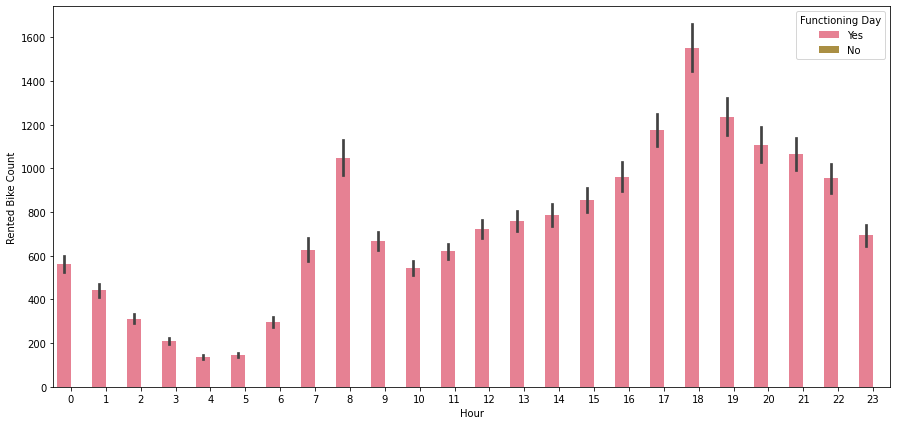

In [7]:
#for chech functioning and non functioning day ,plot (Hour Vs Rented Bike Count Graph)
def barplots(x,y,hue):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    sns.barplot(x=x,y=y,hue=hue,data=data);
barplots('Hour','Rented Bike Count','Functioning Day')

In [8]:
# Grouping by functioning day and calculating the total Rented Bike Count
data.groupby('Functioning Day').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Functioning Day,Rented Bike Count
0,Yes,6172314
1,No,0


As per diagnosis data found that rental bike only given on Functioning Day,So remove Non Functioning Days and then remove Functioning Day Column Also

In [9]:
#Removing data of non functional days (non rented days)
df=data.drop(data[data['Functioning Day'] == 'No'].index) 

In [10]:
#Due to not unsefull in Functioning Day Column ,remove Functioning Day Column
df1=df.drop(['Functioning Day'], axis = 1)

In [11]:
#Checking DataFrame Shape After Removing Non Functional Day Rows And Functional Day Column
print("Filtered Dataframe with only rented bike days :",df1.shape,"\n") 

Filtered Dataframe with only rented bike days : (8465, 13) 





### *2.2 _ Seperate Date, Month, Year from Date Column*

First, let's convert `Date` to a `datecolumn` and extract different parts of the date.

In [12]:
#convert in datetime64[ns] datatype
df1['Date'] = pd.to_datetime(df1['Date']) 
df1['Date']

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8465, dtype: datetime64[ns]

In [13]:
#Seperate Day, Month, Year from DataFrame Column

df1['Day']=df1['Date'].dt.day
df1['Month']=df1['Date'].dt.month
df1['Year']=df1['Date'].dt.year

In [14]:
# drop the Date column after extracting necessory information
df1.drop(columns=['Date'],inplace=True)

## **3. Exploratory Analysis and Visualization**

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "Rented Bike count" and other columns.


> We'll use libraries Matplotlib, Seaborn for visualization.




### *3.1 _ Checking Correlation Of Data*

Correlation is a statistical measure that expresses the strength of the relationship between two variables. 

The two main types of correlation : **positive and negative.** 

**Positive correlation** occurs when two variables move in the same direction; as one increases, so do the other.

**Negative correlation** occurs when two variables move in opposite directions; as one increases, the other decreases. 

Correlation can be used to test hypotheses about cause and effect relationships between variables. Correlation is often used in the real world to predict trends.

<Axes: >

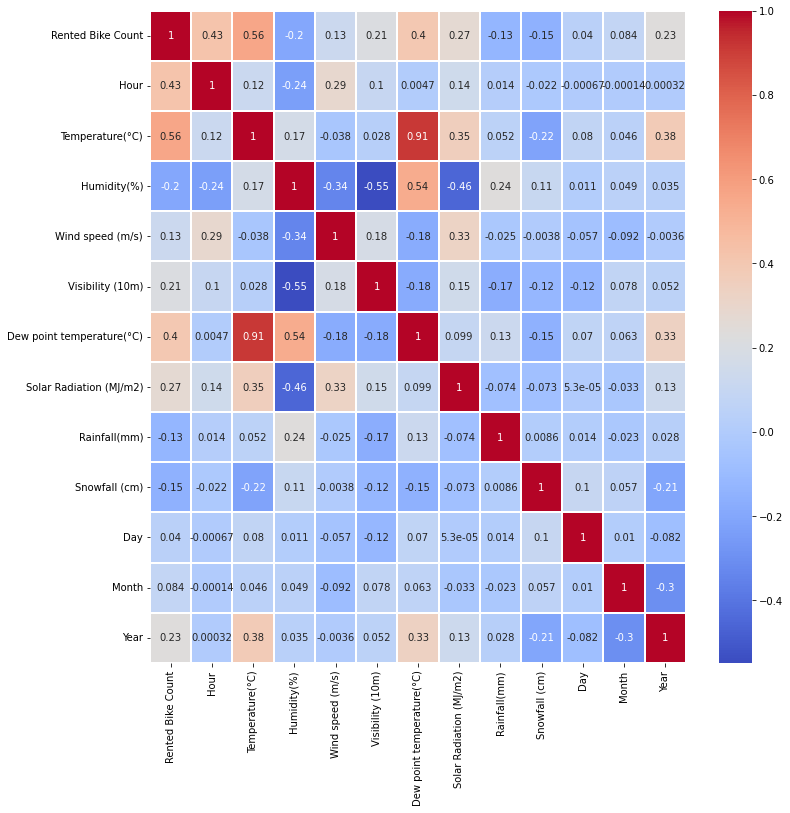

In [15]:
#.corr() use to find correlation with data
data_corr= df1.corr()       
plt.figure(figsize=(12,12))

#cmap use for colour palette , linewidths : set the width of the lines that divide the cells, 
#annot :helps in annotating the heatmap with values if set to True, otherwise values are not provided , linecolor : helps in setting the color of each line that divides heatmap cells
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

`temperature` and `Dew point temperature` are almost 0.91 correlated, So it's generate multicollinearity issue. so we drop `Dew point temperature` feature because if we see `Dew point temperature` is almost 0.4 related to our target variable which is less than `temperature` 0.56

In [16]:
#Drop Dew point temperature(°C) from dataset df1
df1.drop(columns=['Dew point temperature(°C)'],inplace=True)  

Finding Insides:

1. We can see that with our targer variable (Rented Bike Count), the most correlated variables are : Hour, Temperature, Dew point temperature

### *3.2 _ Seperate Numerical And Categorical Variables*

Categorical data is a type of data that is used to group information with similar characteristics 

Numerical data is a type of data that expresses information in the form of numbers.

#### Numarical Variables

In [17]:
#if dtype is not Equal to object type then its a num data
numerical_features=df1.columns[df1.dtypes!='object'].tolist()
numerical_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

In [18]:
# Seprate dataframe for Numerical feature
num_data=df1[numerical_features]
num_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1,2017
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,1,2017
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,1,2017
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,1,2017
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,30,11,2018
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,30,11,2018
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,30,11,2018
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,30,11,2018


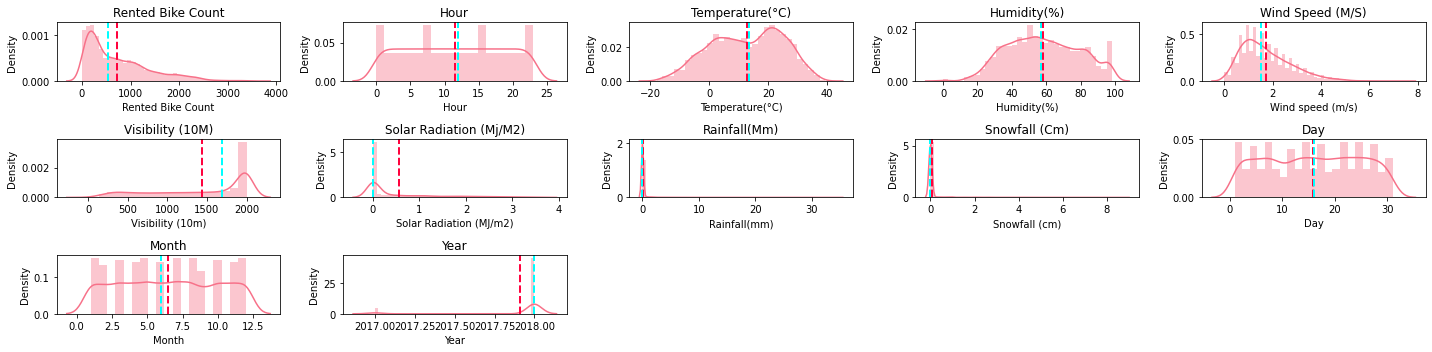

In [19]:
#plot num data to analysis data distribution
fig = plt.figure(figsize = (20,5))
for index,column in enumerate(numerical_features) :
  plt.subplot(3,5,index+1)
  sns.distplot(df1[column])
  feature = df1[column]
  ax = fig.gca() # get current axes
  ax.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=2)  #Rose-Red Color indicate mean of data
  ax.axvline(feature.median(), color='#00ffff', linestyle='dashed', linewidth=2) #Cyan indicate median of data
  plt.title(f'{column.title()}')
  plt.tight_layout()

In [20]:
df1.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Rented Bike Count,1.139700,0.820305
Hour,-0.001261,-1.203446
Temperature(°C),-0.174550,-0.889578
Humidity(%),0.068649,-0.812228
Wind speed (m/s),0.894222,0.754256
Visibility (10m),-0.695306,-0.969125
Solar Radiation (MJ/m2),1.510065,1.145102
Rainfall(mm),14.616921,289.963779
Snowfall (cm),8.292830,90.542378
Day,-0.019049,-1.198170



Right/Positive Skewed Distribution: Mode < Median < Mean: Rented Bike Count, Wind Speed(m/s), Solar Radiation(MJ/m2)

No Skew: Mean = Median = Mode : Hour, Temperature, Humidity(%),Rainfall(mm),Snowfall(cm)


Left/Negative Skewed Distribution: Mean < Median < Mode: visibility(10m)

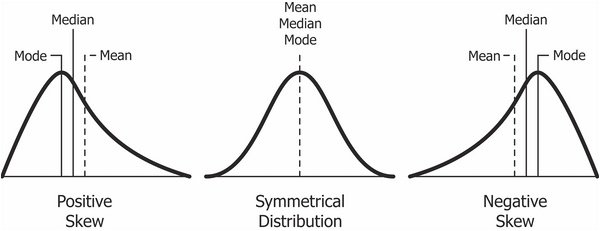


Left-skewed distribution:

- The mean is typically less than the median, and the mode is typically greater than both the mean and the median.
- The majority of the data is concentrated on the right-hand side of the      distribution, with a few extreme values in the left tail.
- The distribution may have a long tail on the left-hand side, indicating 
  that there are some extreme values that are much lower than the bulk of the   data.
- The left-skewed distribution can be caused by the presence of outliers with   low values.
- The left-skewed distribution can affect statistical analyses that assume n   normality, and may require transformation of the data before conducting      certain analyses.

Right-skewed distribution:

- The mean is typically greater than the median, and the mode is typically less than both the mean and the median.
- The majority of the data is concentrated on the left-hand side of the  distribution, with a few extreme values in the right tail.
- The distribution may have a long tail on the right-hand side, indicating that there are some extreme values that are much higher than the bulk of the data.
- The right-skewed distribution can be caused by the presence of outliers with high values.
- The right-skewed distribution can affect statistical analyses that assume normality, and may require transformation of the data before conducting certain analyses.








## Discrete Values

Discrete Variables Count: 4


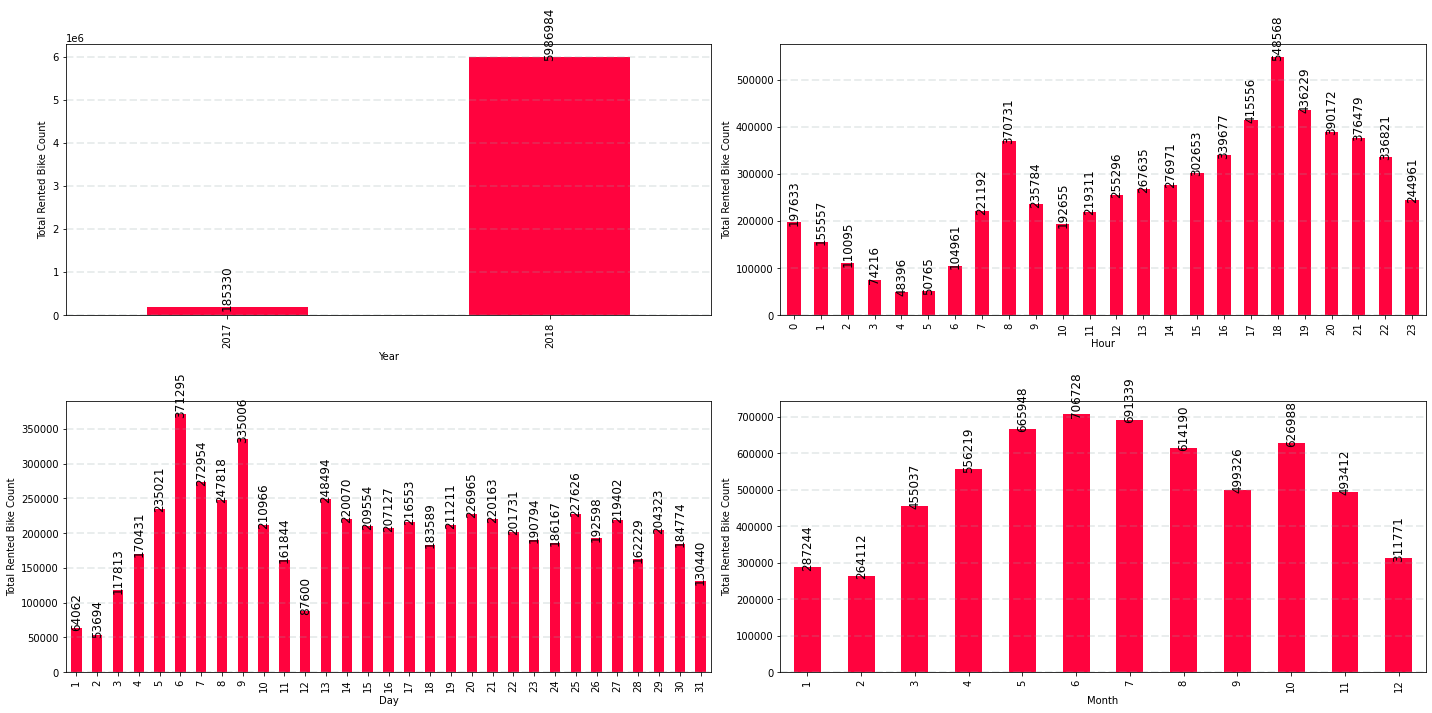

In [21]:
## Lets analyse the discrete values by creating histograms to understand the distribution
num_discrete_value=[feature for feature in numerical_features if len(df1[feature].unique())<32]
print("Discrete Variables Count: {}".format(len(num_discrete_value)))

fig = plt.figure(figsize = (20,10))
for index,column in enumerate(num_discrete_value) :
  plt.subplot(2,2,index+1)
  dataset=df1.copy()
  dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="#ff033e") #kind=bar use for ploting barchart
  feature = df1[column]
  ax = fig.gca()
  plt.ylabel('Total Rented Bike Count')
  plt.tight_layout()
  plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
  for p in ax.patches:
      ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90) #ha use to write count in center and rotation use to rotate count to 90 degree and make clear visible on graph

#### Categorical Variables

In [22]:
#For categorical Data
categorical_features=[col for col in df1.columns if df1[col].dtype=='O']
categorical_features

['Seasons', 'Holiday']

In [23]:
# Seprate dataframe for Categorical feature
cat_data=df1[categorical_features]

In [24]:
# Unique number of categorical features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Seasons and number of categories are 4
The feature is Holiday and number of categories are 2


In [25]:
# GROUPING BY SEASONS AND CALCULATING THE TOTAL RENTED BIKE COUNT
data.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


In [26]:
# GROUPING BY HOLIDAY AND CALCULATING THE TOTAL RENTED BIKE COUNT
data.groupby('Holiday').sum()['Rented Bike Count'].sort_values(ascending = False).reset_index()

,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895


##### Categorical Values

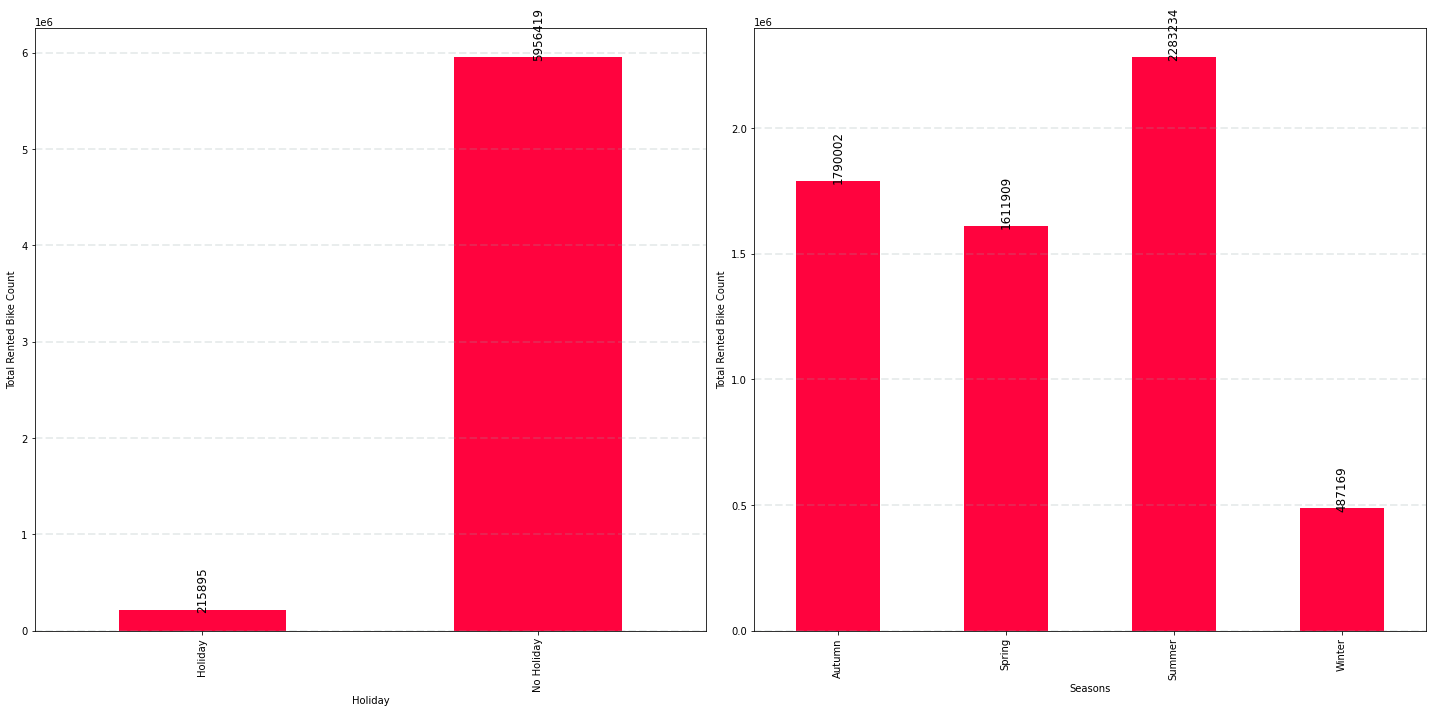

In [27]:
#Find out the relationship between categorical variable and dependent feature Rented Bike Count

fig = plt.figure(figsize = (20,10))
for index,column in enumerate(categorical_features) :
    plt.subplot(1,2,index+1)
    dataset=df1.copy()
    dataset.groupby(feature)['Rented Bike Count'].sum().plot(kind='bar',color="#ff033e")
    feature = df1[column]
    ax = fig.gca()
    plt.ylabel('Total Rented Bike Count')
    plt.tight_layout()
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.2)
    for p in ax.patches:
        ax.annotate(round(p.get_height()),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12, rotation=90)


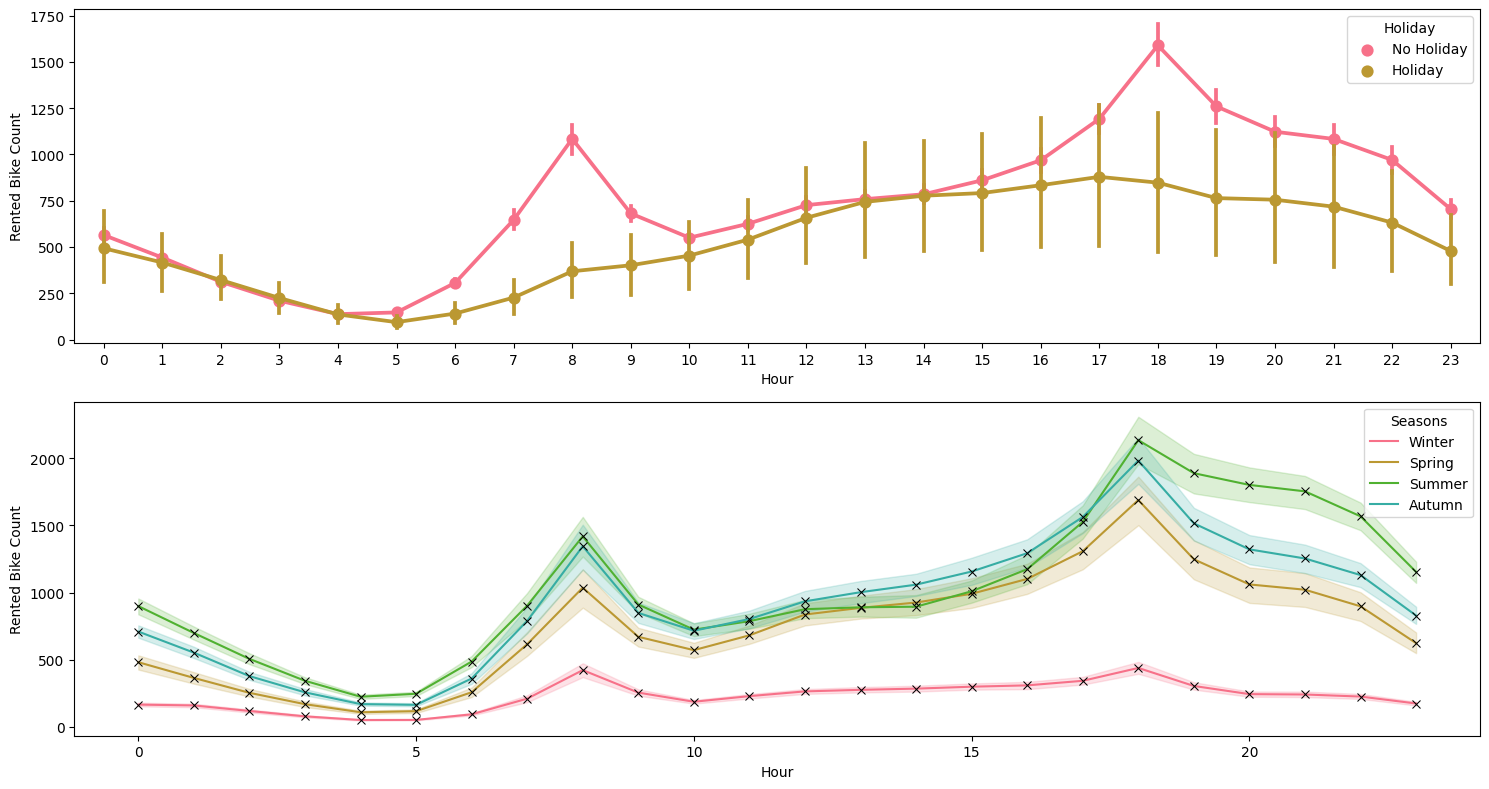

In [28]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,8), dpi=100)
sns.pointplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[0], 
              hue="Holiday")

sns.lineplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[1], 
              hue="Seasons", marker="x",markeredgecolor="black")
plt.tight_layout()

<b>A point plot</b> is a type of statistical visualization that displays the mean and confidence interval (or error bars) of a numeric variable for different categories or groups.
In a point plot, the mean is represented by a point or marker, and the error bars show the confidence interval or standard error of the mean. It is particularly useful for comparing the means of different groups or categories in a dataset.
    
- Look at the error bars to determine the confidence interval or standard error of the mean. The length of the error bars indicates the range of values within which the true population mean is likely to fall with a given level of confidence.

## **4. Feature Engineering On Data**


1. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
2. Identify Inputs and Target
3. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
4. Split the dataset into training and validation sets.


### *4.1 _ Encoding Data*

Encode categorical data in both encoder and check accuracy of encoders:
1. oh_df : OneHotEncoder Data 
2. le_df : LabelEncoder Data 

#### 4.1.1 _ Apply OneHotEncoder on Data



Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [29]:
oh_df=pd.get_dummies(df1, columns=['Seasons', 'Holiday'], drop_first=True)
oh_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month,Year,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,12,1,2017,0,0,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,12,1,2017,0,0,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,12,1,2017,0,0,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,12,1,2017,0,0,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,12,1,2017,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,30,11,2018,0,0,0,1
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,30,11,2018,0,0,0,1
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,30,11,2018,0,0,0,1
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,30,11,2018,0,0,0,1


One-hot encoding approach eliminates the order but it causes the number of columns to expand vastly. So for columns with more unique values try using other techniques like LabelEncoding

#### 4.1.2 _ Apply LabelEncoder

In [30]:
# Encode labels of multiple columns at ones using LabelEncoder
le_df= df1.apply(LabelEncoder().fit_transform)
le_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month,Year
0,252,0,111,28,22,1779,0,0,0,3,1,11,0,0
1,202,1,108,29,8,1779,0,0,0,3,1,11,0,0
2,171,2,103,30,10,1779,0,0,0,3,1,11,0,0
3,105,3,101,31,9,1779,0,0,0,3,1,11,0,0
4,76,4,103,27,23,1779,0,0,0,3,1,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,990,19,205,25,26,1673,0,0,0,0,1,29,10,1
8756,754,20,197,28,23,1779,0,0,0,0,1,29,10,1
8757,685,21,189,30,3,1747,0,0,0,0,1,29,10,1
8758,703,22,184,32,10,1639,0,0,0,0,1,29,10,1


Checking Season Column Data

In [31]:
df1.groupby("Seasons").count()  #for checking raw data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Year
Seasons,,,,,,,,,,,,,
Autumn,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937
Spring,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160
Summer,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Winter,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


In [32]:
le_df.groupby('Seasons').count() #Seasons convert to numerical after apply transformation on data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Day,Month,Year
Seasons,,,,,,,,,,,,,
0,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937,1937
1,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160
2,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
3,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


0 : Autumn , 1 : Spring , 2 : Summer , 3 : Winter
Note thate 0,1,2,3, is just the way of representation.it does not contain any kind of dominance or impact

### **Checking Ditrubutation and Outliner on DataFrame**

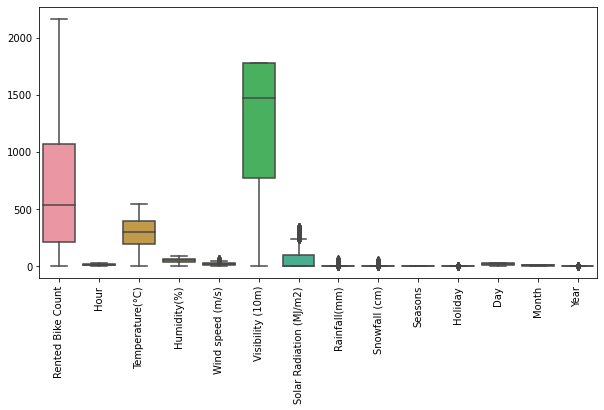

In [33]:
#checking for outliers
plt.figure(figsize=(10,5))   # for define chart size
plt.xticks(rotation =90)     #plot X-axis ticks in 90 degree rotation for clear visible
sns.boxplot(data = le_df)    #box plot of le_df data frame raw data
plt.show()

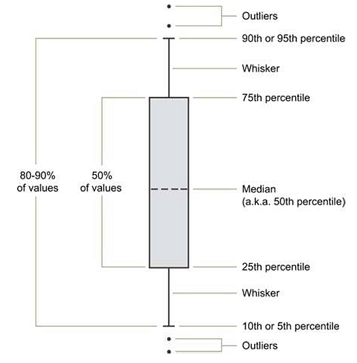

Target Parameter `Rented Bike Count` distributation analysis

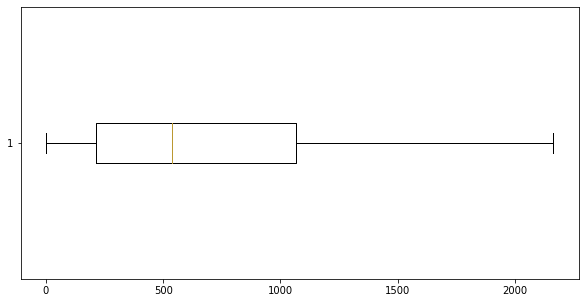

In [34]:
plt.figure(figsize=(10,5))
plt.boxplot(le_df['Rented Bike Count'],vert=False)
plt.show()

Outline detection using Interquartile Range

**Square Root**
The square root method is typically used when your data is moderately skewed. Now using the square root (e.g., sqrt(x)) is  a transformation that has a moderate effect on distribution shape. It is generally used to reduce right skewed data. Finally, the square root can be applied on zero values and is most commonly used on counted data.

Square Root Transformation: Transform the values from y to √y.

-----------------------------------------------------------------


**Log Transformation**
The logarithmic is a strong transformation that has a major effect on distribution shape. This technique is, as the square root method, oftenly used for reducing right skewness. Worth noting, however, is that it can not be applied to zero or negative values.

Log Transformation: Transform the values from y to log(y).

--------------------------------------------------------------------


**Cube root transformation** involves converting x to x^ (1/3). This is a fairly strong transformation with a substantial effect on distribution shape: but is weaker than the logarithm. It can be applied to negative and zero values too. Negatively skewed data

Cube Root Transformation: Transform the values from y to y^(1/3).

Text(0.5, 1.0, 'cube root')

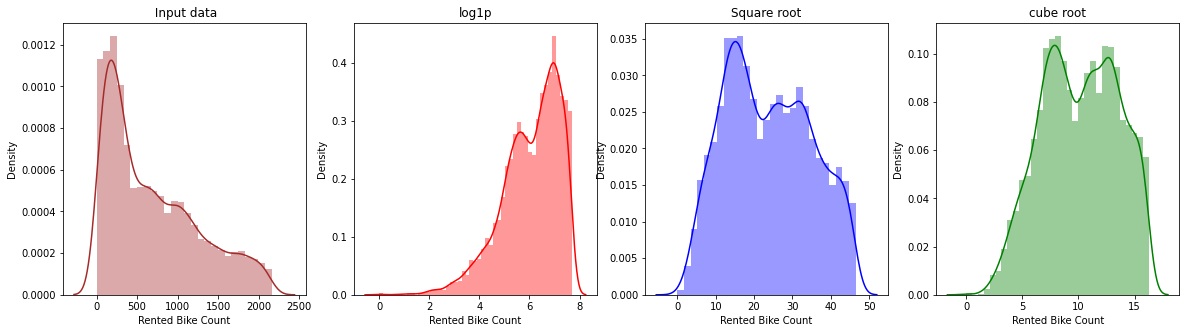

In [35]:
#apply diffrent tranformation technique and checking data distributation
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((le_df['Rented Bike Count']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log1p(le_df['Rented Bike Count']+0.0000001),ax=axes[1],color='red').set_title("log1p") #transform only posible in positive value and >0 value so add 0.0000001 in data
sns.distplot(np.sqrt(le_df['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root")
sns.distplot(np.cbrt(le_df['Rented Bike Count']*2),ax=axes[3], color='green').set_title("cube root")

In [36]:
import scipy.stats as stats

In [37]:
def plotvariable(df,variable):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)   #means 1 row, 2 Columns and 1st plot
  df[variable].hist(bins=30)

  ##QQ plot
  plt.subplot(1,2,2)
  stats.probplot(df[variable], dist='norm',plot=plt)
  plt.show()
  print(df[variable].skew())


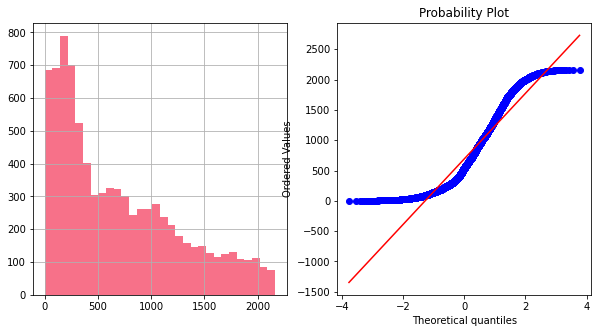

0.7938148420670103


In [38]:
plotvariable(le_df,'Rented Bike Count')

our `Rented Bike Count` target is not normally distributed ,so we need to make some transformations before supply to the model

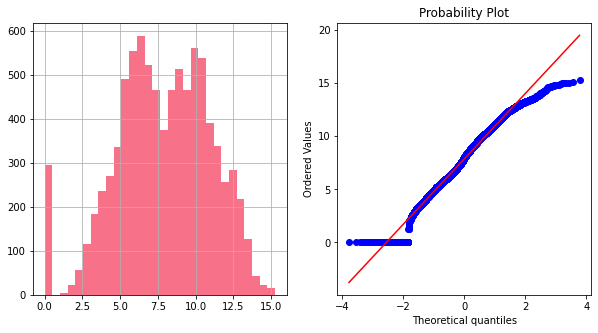

-0.31775917995579267


-0.31775917995579267

In [39]:
data["RBC_qb"]=np.cbrt(data['Rented Bike Count']) #try cube root technique to convert positive screwd to normal distributation

plotvariable(data,"RBC_qb")
data['RBC_qb'].skew()

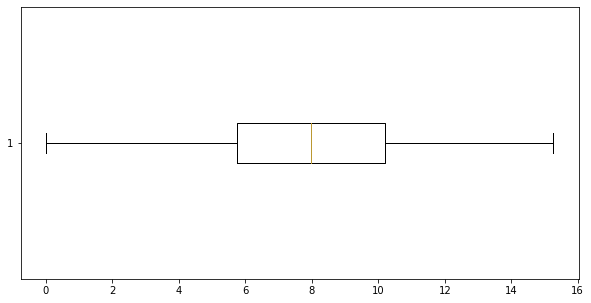

In [40]:
plt.figure(figsize=(10,5))
plt.boxplot(data["RBC_qb"],vert=False)
plt.show()

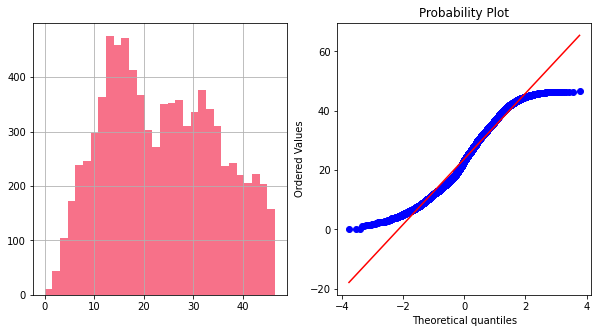

0.16925358699257584


0.16925358699257584

In [41]:
le_df['Rented Bike Count']=np.sqrt(le_df['Rented Bike Count'])

plotvariable(le_df,'Rented Bike Count')
le_df['Rented Bike Count'].skew()

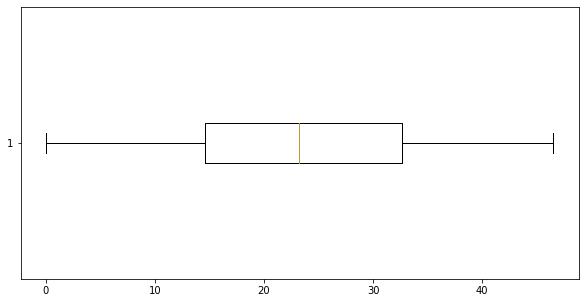

In [42]:

plt.figure(figsize=(10,5))
plt.boxplot(le_df["Rented Bike Count"],vert=False)
plt.show()



Now, Its Look Like Normal Distributation

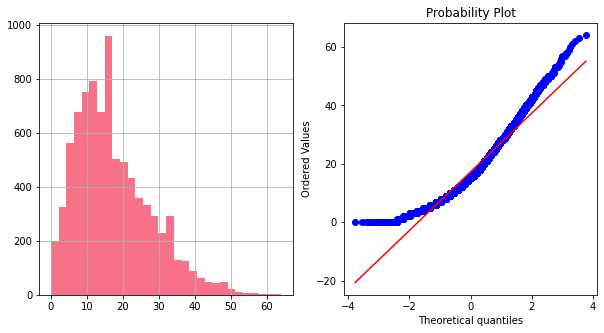

0.8616479716535727


In [43]:
plotvariable(le_df,'Wind speed (m/s)')

not look like normal and right screwed distributation so need to apply transformation

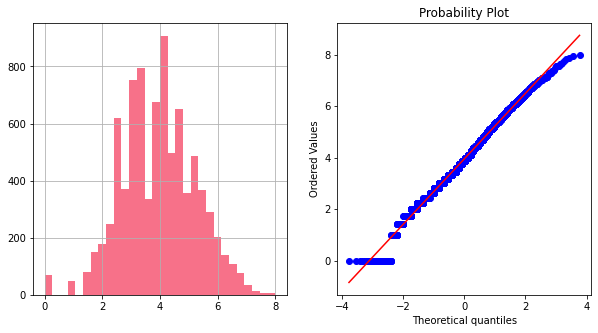

-0.014489471518114892


In [44]:
le_df['Wind speed (m/s)']=np.sqrt(le_df['Wind speed (m/s)'])

plotvariable(le_df,'Wind speed (m/s)')

look like a normal distribution.

### *4.2 _ Identify Inputs and Targets*

- The column `Rented Bike Count` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first and the last column) can be used as inputs to the model.
 

>Create a list `X` of column names containing data that can be used as input to train the model, and identify the target column as the variable `y`.

>Make sure that the `Date` and `Rented Bike Count` columns are not included in `X`.

Now that we've identified the input and target columns, we can separate input & target data.

In [45]:
# Identify the input columns (a list of column names)

X=le_df.drop('Rented Bike Count',axis=1)
y=le_df['Rented Bike Count']

### *4.3 _ Spliting Training and Testing Set*
Finally, let's split the dataset into a training and testing set. We'll use a randomly select 30% subset of the data for validation. Also, we'll use just the numeric and encoded columns.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [47]:
# Let's check the shape of the train and test dataset

print(f'The shape of the train and test set for the independent variables are : X_train = {X_train.shape}, X_test = {X_test.shape}')
print(f'The shape of the train and test set for the dependent variables are : y_train = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test set for the independent variables are : X_train = (6772, 13), X_test = (1693, 13)
The shape of the train and test set for the dependent variables are : y_train = (6772,), y_test = (1693,)


## **5. Scaling Data and Model Building Using Various Regression Techniques**

Regression searches for relationships among variables. 

The dependent features are called the dependent variables, outputs, or responses. 

The independent features are called the independent variables, inputs, regressors, or predictors.

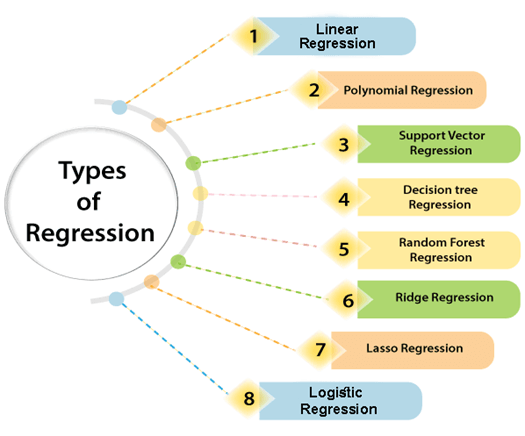

**Different Models Accuracy Checking Using Robust Scaler**

In [48]:
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    rob =RobustScaler()

    X_train = rob.fit_transform(X_train)
    X_test = rob.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    

**R2** shows how well terms (data points) fit a curve or line. 
**Adjusted R2** also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.

Adjusted R2 will always be less than or equal to R2.



**R2** assumes that every single variable explains the variation in the dependent variable. 

**The adjusted R2** tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable.

<html>
<img src="https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG" height="600" width="600" alt="bike">
</html>




**MSE** is a risk function that allows us to calculate the average squared difference between a feature’s or variable’s predicted and actual value.

**RMSE** is an abbreviation for Root Mean Square Error, which is the square root of the value obtained from the Mean Square Error function.

**Linear Regression :**

<html>
<img src="https://miro.medium.com/max/2600/1*2ZnDb5b6UtBZ41Wy90MTkw.jpeg" height="300" width="600" alt="bike">
</html>

Here is multiple dependent variables, So its call a multiple linear regression



<html>
<img src="https://miro.medium.com/max/1160/1*Jfx203VYFtcM958gbFsiXA.png" height="300" width="600" alt="bike">
</html>

R^2 is 0.6484023843668458
 Adj R^2 is 0.645680068105243
 RMSE is: 6.782028398532072


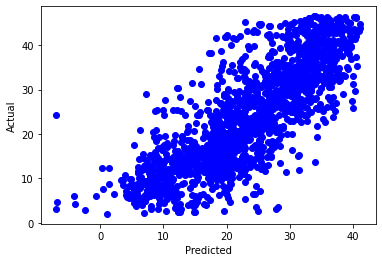

In [49]:
predict(LinearRegression(),X,y)

**Models Accuracy Checking Using MinMaxScaler**

In [50]:
def predict_mm(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    mm =MinMaxScaler()

    X_train = mm.fit_transform(X_train)
    X_test = mm.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    

R^2 is 0.6484023843668462
 Adj R^2 is 0.6456800681052435
 RMSE is: 6.782028398532068


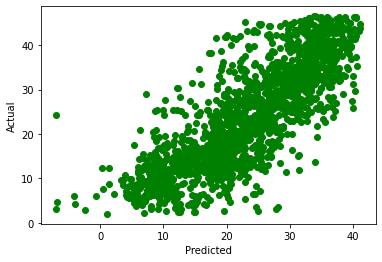

In [51]:
predict_mm(LinearRegression(),X,y)

**Models Accuracy Checking Using Standard Scaler**

In [52]:
def predict_ss(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    ss =StandardScaler()

    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='r')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)} \n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    pred_y_df=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
    print(pred_y_df[0:10])

Checking Actual value and Predicated value with it's differenace 

R^2 is 0.6484023843668462 
 Adj R^2 is 0.6456800681052435
 RMSE is: 6.782028398532068
      Actual Value  Predicted Value  Difference
5028     33.749074        29.317478    4.431596
5121     11.224972         9.318051    1.906921
4191     33.955854        34.200968   -0.245115
8498     16.852300        19.913517   -3.061218
8072     41.713307        19.744203   21.969104
3300     33.075671        30.792839    2.282832
1461      7.615773         5.867516    1.748257
1324      4.472136         5.409999   -0.937863
8128     39.862263        36.828032    3.034231
16       21.931712        18.670651    3.261061


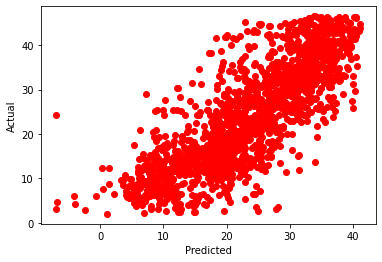

In [53]:
predict_ss(LinearRegression(),X,y)